In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
#%matplotlib inline

Text(0, 0.5, 'y')

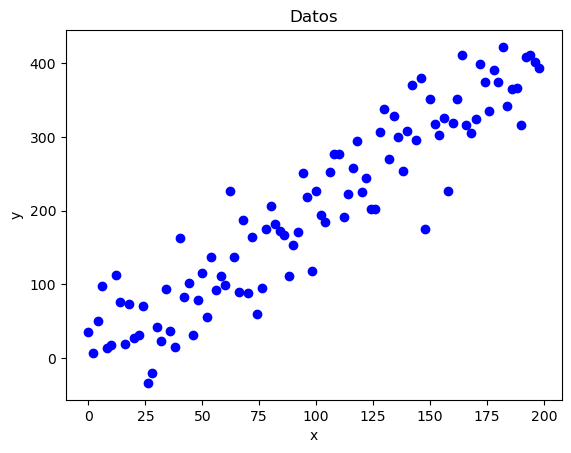

In [3]:
# Datos sinteticos 
def f(x):  # función f(x) = 3*x + 10 + 50*ruido
    np.random.seed(42)
    y = 2*x + 10 + 50*np.random.randn(x.shape[0])
    return y
x = np.arange(0, 200, 2) 
y = f(x) 
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('y')

In [4]:
# Importamos la clase de Regresión Lineal de scikit-learn y metricas de evaluacion
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
# Creamos un objeto de la clase LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x.reshape(-1,1), y) 

regresion_lineal.fit(x.reshape(-1,1), y) 

LinearRegression()

In [6]:
#Obteniendo los coeficientes:

b_1 = regresion_lineal.coef_
b_0 = regresion_lineal.intercept_

print(f'Pendiente: {b_1}. Intercepto: {b_0}')

Pendiente: [2.03483148]. Intercepto: 1.3593572961310656


In [7]:
n=len(x)

y_predicted = b_0 + b_1*x

residuals = (y - y_predicted)

# sum of squared errors
sse = np.sum(residuals**2)

# total sum of squares (y)
#sst = np.sum( (y - np.mean(y))**2 )

# total sum of squares (x)
sst_x = np.sum( (x - np.mean(x))**2 )

# standard error of regression
s = np.sqrt(sse/(n-2))

# our alpha for 95% confidence
alpha = 0.05

# degrees of freedom
dof = n - 2

In [8]:
# standard error of the gradient (slope)
sB1 = s/np.sqrt(sst_x)

# t-value for alpha/2 with n-2 degrees of freedom
t = stats.t.ppf(1-alpha/2, dof)

# compute the upper and lower limits on our B1 (slope) parameter
B1_upper = b_1 + t * sB1
B1_lower = b_1 - t * sB1

# compute the corresponding upper and lower B0 values (y intercepts)
B0_lower = y.mean() - B1_upper*x.mean()
B0_upper = y.mean() - B1_lower*x.mean()

In [ ]:
print(f'Intervalo de confianza para B1: ({B1_lower}, {B1_upper})')
print(f'Intervalo de confianza para B0: ({B0_lower}, {B0_upper})')

margen_error_B1 = t*sB1

print(f'Margen de error de b1: {b_1} ± {margen_error_B1}')

Intervalo de confianza para B1: ([1.87810705], [2.19155592])
Intervalo de confianza para B0: ([-14.1563615], [16.87507609])
[2.03483148] ± 0.15672443229871752


Text(0, 0.5, 'y')

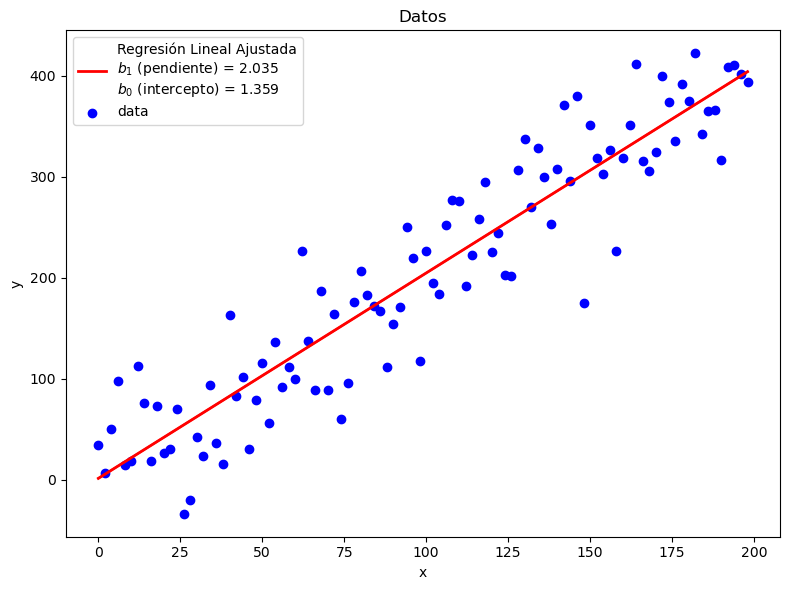

In [144]:
# Calcular B0 sin usar B1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), tight_layout=True)
# Plot the regression line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [b_0 + b_1*x.min(), b_0 + b_1*x.max()] , '-r')

# Plot the mean line, we only need two points to define a line, use xmin and xmax
#ax.plot([x.min(), x.max()], [y.mean(), y.mean()] , '--m', label='Mean Y')

# Plot the upper and lower confidence limits for the standard error of the gradient (slope)
#ax.plot([x.min(), x.max()], [B0_upper + B1_upper*x.min(), B0_upper + B1_upper*x.max()] , '--r', label='Upper B0 confidence limit (95%)')
#ax.plot([x.min(), x.max()], [B0_lower + B1_lower*x.min(), B0_lower + B1_lower*x.max()] , '--g', label='Upper B0 confidence limit (95%)')
etiqueta_regresion = (
    f'Regresión Lineal Ajustada\n'
    f'$b_1$ (pendiente) = {b_1[0]:.3f}\n' 
    f'$b_0$ (intercepto) = {b_0:.3f}'
)
ax.plot(
    [x.min(), x.max()],  # Puntos x para inicio y fin de la línea
    [b_0 + b_1 * x.min(), b_0 + b_1 * x.max()], # Puntos y correspondientes
    color='red',        
    linestyle='-',      
    linewidth=2,        
    label=etiqueta_regresion 
)

plt.scatter(x,y,label='data', color='blue')
plt.title('Datos')
ax.legend(loc='best', fontsize='medium') 
plt.xlabel('x')
plt.ylabel('y')

In [ ]:

def accuracy(v):
    """
    Calcula La exactitud de un clasificador.
    v: un array o tupla de numpy con la forma (TP, TN, FP, FN).
    """
    #Asignacion de valores de confusion
    tp, tn, fp, fn = v
    denominator = tp + tn + fp + fn 
    if denominator == 0:
        return 0
    return (tp + tn) / denominator



In [8]:
v = [0, 0,0,0]

print(accuracy(v))

0
